In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
x_test/=2
n_classes=10

y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='elu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='elu')) 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='elu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [20]:
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 119s 301ms/step - loss: 1.6436 - accuracy: 0.4161 - val_loss: 1.4070 - val_accuracy: 0.5068
Epoch 2/10
391/391 [==============================] - 119s 304ms/step - loss: 0.9932 - accuracy: 0.6544 - val_loss: 1.1711 - val_accuracy: 0.5997
Epoch 3/10
391/391 [==============================] - 112s 287ms/step - loss: 0.8131 - accuracy: 0.7166 - val_loss: 1.1405 - val_accuracy: 0.5985
Epoch 4/10
391/391 [==============================] - 115s 293ms/step - loss: 0.6899 - accuracy: 0.7605 - val_loss: 1.0667 - val_accuracy: 0.6262
Epoch 5/10
391/391 [==============================] - 117s 299ms/step - loss: 0.5664 - accuracy: 0.8047 - val_loss: 1.0742 - val_accuracy: 0.6377
Epoch 6/10
391/391 [==============================] - 112s 288ms/step - loss: 0.4717 - accuracy: 0.8382 - val_loss: 1.0119 - val_accuracy: 0.6564
Epoch 7/10
391/391 [==============================] - 112s 287ms/step - loss: 0.3674 - accuracy: 0.8727 - val_loss: 1.0925 -

In [21]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))

batch = x_test [100:109] 
labels = np.argmax(y_test[100: 109], axis=-1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 562ms/step


In [26]:
class_result = np.argmax(predictions,axis=-1)

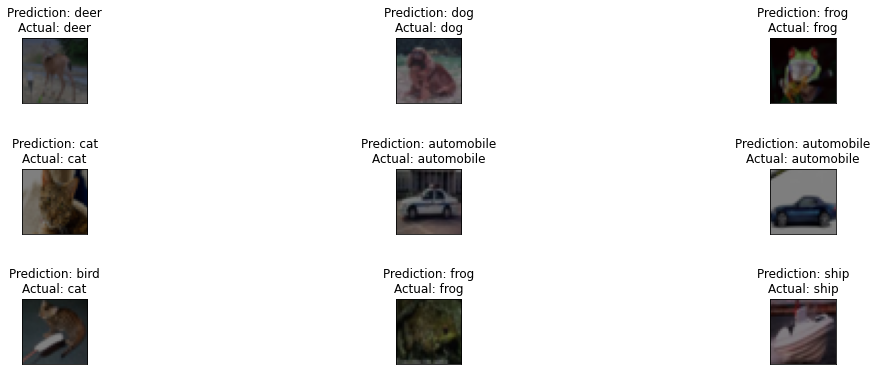

In [28]:
fig, axs = plt.subplots (3, 3, figsize = (19,6))
fig.subplots_adjust(hspace= 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels [key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis ().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    axs[i].imshow(img)

plt.show()